In [1]:
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt

from dataset import PlanTDataset
from dataset import generate_batch
from util.viz_batch import viz_batch

In [2]:
import os 
scenarios = os.listdir("/home/simon/PDM-Lite-DS/Town12")
scenarios

['BlockedIntersection',
 'ConstructionObstacleTwoWays',
 'OppositeVehicleTakingPriority',
 'VehicleTurningRoute',
 'SignalizedJunctionLeftTurn',
 'ParkingExit',
 'Accident',
 'InterurbanActorFlow',
 'InterurbanAdvancedActorFlow',
 'AccidentTwoWays',
 'DynamicObjectCrossing',
 'EnterActorFlow',
 'NonSignalizedJunctionLeftTurn',
 'ControlLoss',
 'VehicleOpensDoorTwoWays',
 'SignalizedJunctionRightTurn',
 'OppositeVehicleRunningRedLight',
 'CrossingBicycleFlow',
 'NonSignalizedJunctionRightTurn',
 'results.zip',
 'MergerIntoSlowTrafficV2',
 'VehicleTurningRoutePedestrian',
 'HazardAtSideLane',
 'HardBreakRoute',
 'YieldToEmergencyVehicle',
 'PedestrianCrossing',
 'ParkingCrossingPedestrian',
 'HighwayExit',
 'HazardAtSideLaneTwoWays',
 'ConstructionObstacle',
 'ParkedObstacleTwoWays',
 'EnterActorFlowV2',
 'ParkedObstacle',
 'PriorityAtJunction',
 'MergerIntoSlowTraffic',
 'InvadingTurn']

In [ ]:
import yaml
# Read YAML file
with open("/home/simon/PlanTUpdate/config/config.yaml", 'r') as stream:
    cfg = yaml.safe_load(stream)

with open("/home/simon/PlanTUpdate/config/model/PlanT.yaml", 'r') as stream:
    plnt = yaml.safe_load(stream)

cfg["model"] = plnt

cfg["trainset_size"] = 1

class DictAsMember(dict):
    def __getattr__(self, name):
        value = self[name]
        if isinstance(value, dict):
            value = DictAsMember(value)
        return value

cfg = DictAsMember(cfg)

ds = PlanTDataset("/home/simon/PDM-Lite-DS/Town12/VehicleTurningRoutePedestrian", cfg)

Loading 9675 samples from 50 folders


30


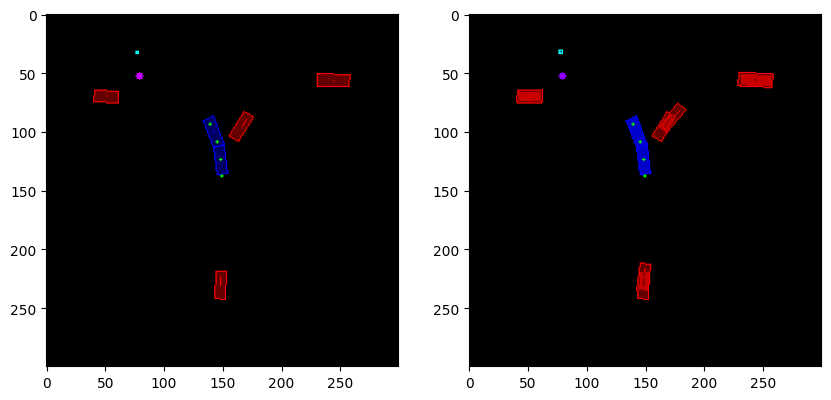

32


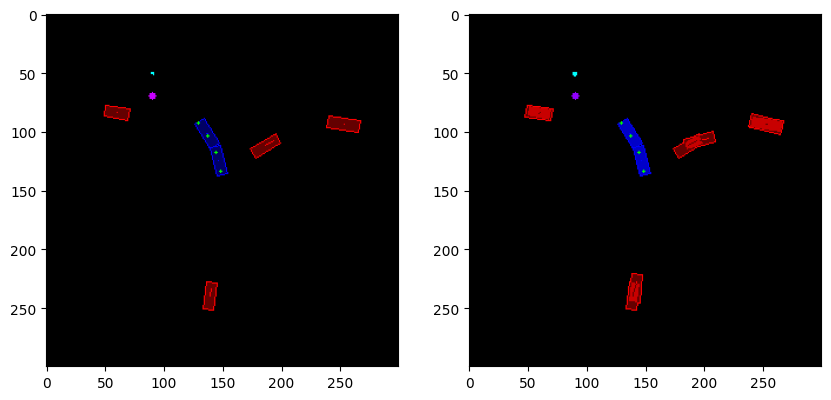

34


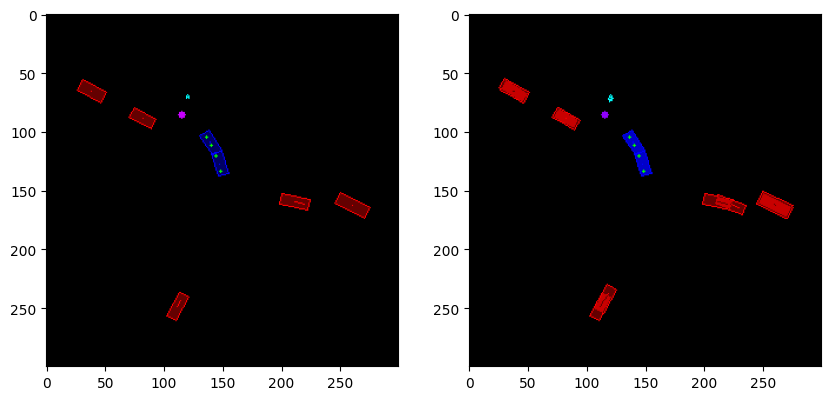

36


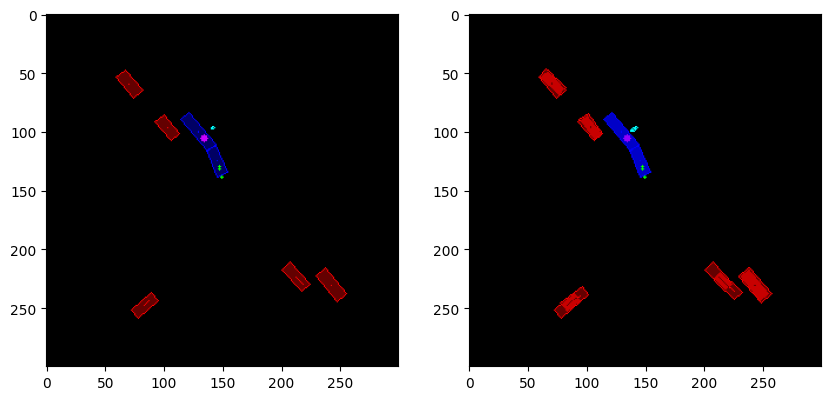

38


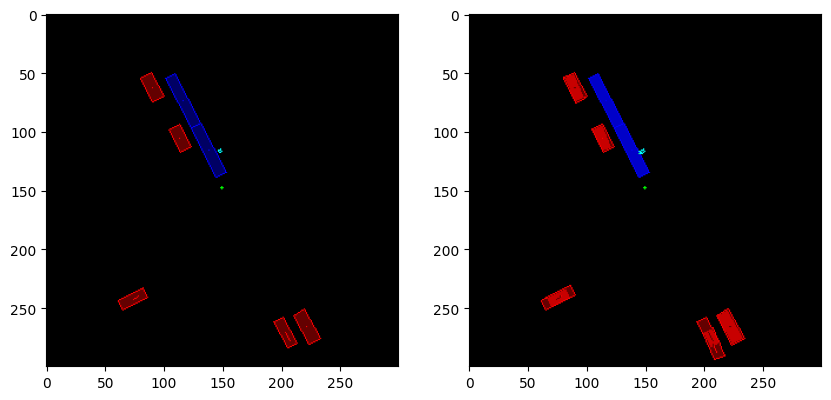

40


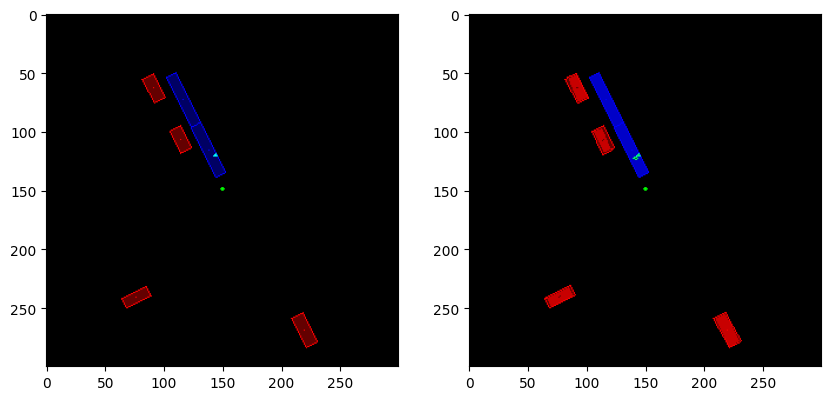

42


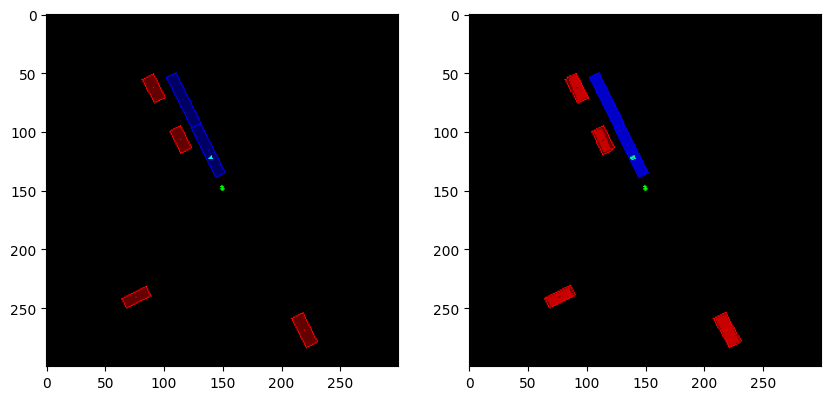

44


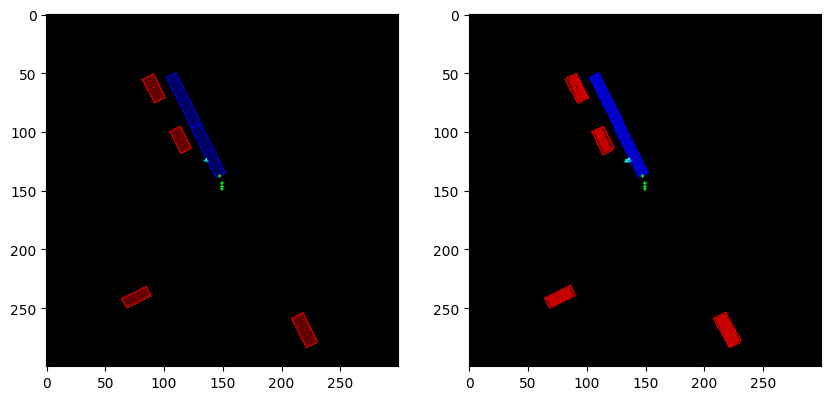

46


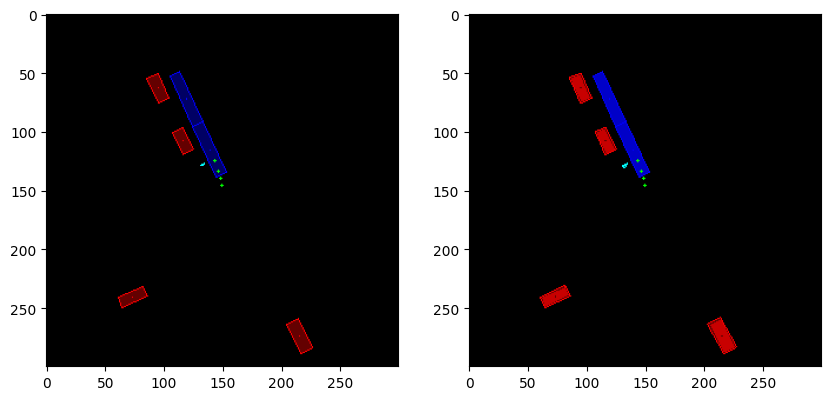

48


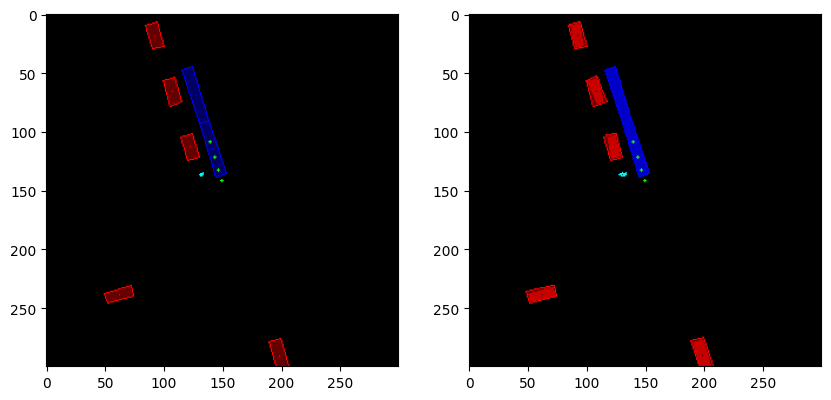

In [4]:
for i in range(30, 50, 2):

    b = generate_batch([ds[i]])

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(10, 5)

    print(i)

    img_in = cv2.cvtColor(viz_batch(b), cv2.COLOR_BGR2RGB)
    ax1.imshow(img_in)

    b["x_objs"][b["x_objs"][:, 0]!=2] = torch.tensor(ds.unquantize_box(b["y_objs"][b["x_objs"][:, 0]!=2])) # Unquantize all but route
    b["x_objs"][b["x_objs"][:, 0] == 10] = 0
    img_out = cv2.cvtColor(viz_batch(b), cv2.COLOR_BGR2RGB)
    ax2.imshow(img_in + img_out)
    plt.show()